In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

doh_dailyreport = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220219 - 05 DOH Data Collect - Daily Report.csv')
#doh_baseline = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220219 - 10 DOH Data Collect - Baseline.csv')
metadata = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220219 - 03 Metadata - Fields.csv')
doh_cases_b0 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220219 - 04 Case Information_batch_0.csv', low_memory=False)

# Test-7 Data of Spread of Disease
sod = pd.read_csv('Test-7\Test 7 - Galvez\Test 7 Galvez - Spread of Disease.csv', skiprows = 19, usecols=[0,1,5,9,13])

#Renaming SoD to respective column names
sod.columns = ['days', 'asym', 'moderate', 'severe', 'mild']


tick_represents = 10
ticks_to_days = int(1440/tick_represents)

In [29]:
sod_days = sod.iloc[1::ticks_to_days, :]

In [30]:
sod_days.head()

,days,asym,moderate,severe,mild
1,1,0,17,0,0
145,2,1,21,3,3
289,3,2,27,6,6
433,4,3,42,21,21
577,5,4,56,33,28


In [31]:
doh_cases_b0.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Removal Type is ""Recovered"", but no Recovered ..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Age or Birthdate is Invalid\nCase has Admittin...
3,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
4,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,YES,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."


In [32]:
# Convert reportdate 'string' from dailyreport to 'datetime' datatype
doh_dailyreport['reportdate'] = pd.to_datetime(doh_dailyreport['reportdate'])

# Filtering out to only the NCR Region
ncr = doh_dailyreport[doh_dailyreport['region'] == 'NATIONAL CAPITAL REGION (NCR)']

district_1 = "NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PROVINCE)"

# Filtering out to only Manila City
manila = doh_dailyreport[doh_dailyreport['province'] == district_1]


# Metadata
### What do the headers mean?

Refer to Index [47-69] for the cases 

In [33]:
metadata;

# Select Pandas dataframe rows between two dates

[Guide](https://www.interviewqs.com/ddi-code-snippets/select-pandas-dataframe-rows-between-two-dates)

In [34]:
start_date = '2021-08-01'
end_date = '2021-12-15'

In [35]:
mask = (ncr['reportdate'] > start_date) & (ncr['reportdate'] <= end_date)
manila_mask = (manila['reportdate'] > start_date) & (manila['reportdate'] <= end_date)

In [36]:
ncr_update = ncr.loc[mask]

# Group cases in dates

### NCR

In [37]:
#ncr_date = ncr.groupby([ncr['reportdate'].dt.date]).sum()
ncr_date = ncr_update.groupby([ncr['reportdate'].dt.date]).sum()
ncr_date.head()

,id,icu_v,icu_o,isolbed_v,isolbed_o,beds_ward_v,beds_ward_o,mechvent_v,mechvent_o,icu_v_nc,icu_o_nc,nonicu_v_nc,nonicu_o_nc,mechvent_v_nc,mechvent_o_nc,qnurse,qdoctor,qother,nurse_adm,doctor_adm,other_adm,susp_asym,susp_mild,susp_severe,susp_crit,susp_died,susp_mod,prob_asym,prob_mild,prob_severe,prob_crit,prob_died,prob_mod,conf_asym,conf_mild,conf_severe,conf_crit,conf_died,conf_mod,tpatient_adm,tpatient_er,tpatient_icu,trans_ttmf,discharged,north_coord,east_coord
reportdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-02,63997878.0,495.0,660.0,2206.0,2310.0,1966.0,1683.0,571.0,402.0,766.0,846.0,5286.0,10175.0,689.0,562.0,371.0,139.0,273.0,36.0,11.0,36.0,448.0,441.0,250.0,65.0,29.0,609.0,66.0,117.0,114.0,49.0,21.0,311.0,229.0,696.0,634.0,340.0,4.0,967.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-03,64271856.0,474.0,677.0,2184.0,2390.0,1886.0,1712.0,578.0,422.0,723.0,825.0,4880.0,10730.0,635.0,572.0,371.0,139.0,273.0,36.0,11.0,36.0,416.0,445.0,279.0,61.0,29.0,544.0,66.0,153.0,115.0,57.0,21.0,277.0,225.0,712.0,665.0,364.0,4.0,1030.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-04,64536176.0,479.0,661.0,2198.0,2418.0,1803.0,1816.0,587.0,415.0,692.0,836.0,4948.0,10679.0,618.0,535.0,371.0,139.0,273.0,36.0,11.0,36.0,404.0,460.0,282.0,62.0,29.0,550.0,98.0,135.0,116.0,44.0,21.0,287.0,289.0,722.0,742.0,363.0,4.0,1124.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-05,64807802.0,456.0,701.0,2115.0,2418.0,1710.0,1934.0,554.0,455.0,722.0,869.0,5118.0,10527.0,656.0,509.0,371.0,139.0,273.0,36.0,11.0,36.0,373.0,428.0,263.0,73.0,29.0,660.0,86.0,106.0,109.0,53.0,21.0,275.0,309.0,777.0,735.0,376.0,4.0,1213.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-06,65081180.0,471.0,679.0,2129.0,2489.0,1734.0,1949.0,545.0,456.0,668.0,846.0,5143.0,10407.0,642.0,511.0,371.0,139.0,273.0,36.0,11.0,36.0,386.0,495.0,251.0,85.0,29.0,505.0,75.0,120.0,110.0,45.0,21.0,271.0,328.0,842.0,795.0,379.0,4.0,1282.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0


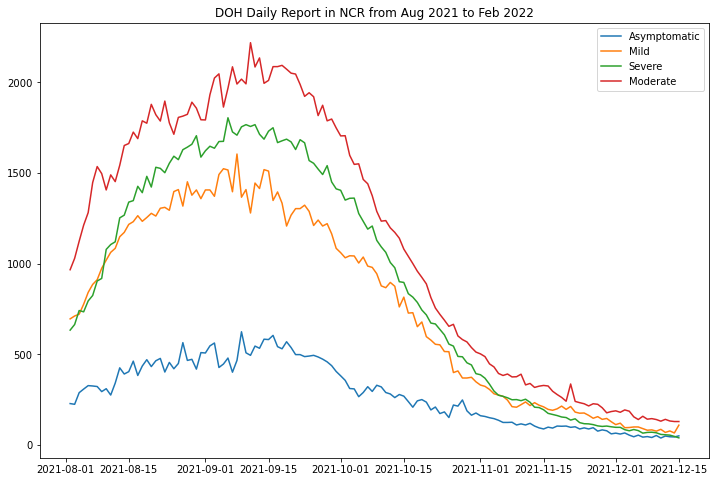

In [38]:
plt.figure(figsize=(12,8))
plt.plot(ncr_date.conf_asym)
plt.plot(ncr_date.conf_mild)
plt.plot(ncr_date.conf_severe)
plt.plot(ncr_date.conf_mod)
plt.legend(['Asymptomatic', 'Mild', 'Severe', 'Moderate'])
plt.title('DOH Daily Report in NCR from Aug 2021 to Feb 2022')
plt.show()

## Manila (NCR, First District)

In [39]:
#manila_update_2 = manila_update.groupby([manila['reportdate'].dt.date]).sum()
manila_date = manila.loc[mask].groupby([manila['reportdate'].dt.date]).sum()
manila_date.head()

,id,icu_v,icu_o,isolbed_v,isolbed_o,beds_ward_v,beds_ward_o,mechvent_v,mechvent_o,icu_v_nc,icu_o_nc,nonicu_v_nc,nonicu_o_nc,mechvent_v_nc,mechvent_o_nc,qnurse,qdoctor,qother,nurse_adm,doctor_adm,other_adm,susp_asym,susp_mild,susp_severe,susp_crit,susp_died,susp_mod,prob_asym,prob_mild,prob_severe,prob_crit,prob_died,prob_mod,conf_asym,conf_mild,conf_severe,conf_crit,conf_died,conf_mod,tpatient_adm,tpatient_er,tpatient_icu,trans_ttmf,discharged,north_coord,east_coord
reportdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-02,10530912.0,152.0,123.0,634.0,551.0,442.0,372.0,113.0,66.0,146.0,222.0,1060.0,1969.0,138.0,135.0,46.0,19.0,53.0,17.0,2.0,15.0,10.0,105.0,13.0,11.0,10.0,123.0,3.0,30.0,11.0,8.0,2.0,36.0,46.0,186.0,160.0,88.0,1.0,306.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0
2021-08-03,10574595.0,145.0,130.0,627.0,544.0,436.0,392.0,123.0,70.0,145.0,224.0,1014.0,2062.0,135.0,138.0,46.0,19.0,53.0,17.0,2.0,15.0,14.0,109.0,13.0,13.0,10.0,121.0,1.0,31.0,15.0,7.0,2.0,34.0,53.0,185.0,168.0,91.0,1.0,313.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0
2021-08-04,10617983.0,137.0,135.0,619.0,573.0,428.0,401.0,125.0,69.0,146.0,224.0,1010.0,2057.0,140.0,135.0,46.0,19.0,53.0,17.0,2.0,15.0,12.0,113.0,12.0,8.0,10.0,125.0,3.0,29.0,16.0,10.0,2.0,38.0,49.0,194.0,188.0,92.0,1.0,328.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0
2021-08-05,10663965.0,132.0,141.0,579.0,563.0,412.0,445.0,123.0,75.0,145.0,232.0,1034.0,2061.0,138.0,132.0,46.0,19.0,53.0,17.0,2.0,15.0,7.0,121.0,15.0,9.0,10.0,123.0,1.0,23.0,14.0,8.0,2.0,30.0,60.0,209.0,164.0,88.0,1.0,372.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0
2021-08-06,10708950.0,140.0,134.0,602.0,581.0,403.0,451.0,122.0,77.0,143.0,241.0,1097.0,1976.0,136.0,136.0,46.0,19.0,53.0,17.0,2.0,15.0,8.0,127.0,17.0,8.0,10.0,120.0,1.0,22.0,9.0,7.0,2.0,23.0,58.0,218.0,186.0,85.0,1.0,373.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0


In [40]:
#Scale NetLogo data to fit DOH graph
manila_area = 24980000
netlogo_area = 225000
scale_factor = manila_area/netlogo_area

df = sod_days.drop('days', axis=1)
sod_scaled = df * scale_factor
sod_scaled = pd.concat((sod_scaled, sod_days.days), 1)

C:\Users\Daft\AppData\Local\Temp\ipykernel_14472\2325699292.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  sod_scaled = pd.concat((sod_scaled, sod_days.days), 1)


In [43]:
sod_days.head()

,days,asym,moderate,severe,mild
1,1,0,17,0,0
145,2,1,21,3,3
289,3,2,27,6,6
433,4,3,42,21,21
577,5,4,56,33,28


In [41]:
sod_scaled.head()

,asym,moderate,severe,mild,days
1,0.000000,1887.377778,0.000000,0.000000,1
145,111.022222,2331.466667,333.066667,333.066667,2
289,222.044444,2997.600000,666.133333,666.133333,3
433,333.066667,4662.933333,2331.466667,2331.466667,4
577,444.088889,6217.244444,3663.733333,3108.622222,5


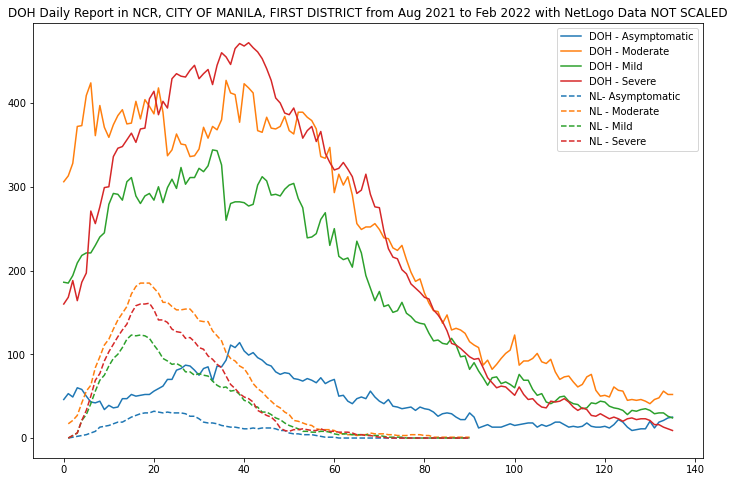

In [45]:
plt.figure(figsize=(12,8))
plt.plot(manila_date.reset_index().index, manila_date.conf_asym)
plt.plot(manila_date.reset_index().index, manila_date.conf_mod)
plt.plot(manila_date.reset_index().index, manila_date.conf_mild)
plt.plot(manila_date.reset_index().index, manila_date.conf_severe)

plt.plot(sod_days.days, sod_days.asym, '--', color="tab:blue")
plt.plot(sod_days.days, sod_days.moderate, '--', color="tab:orange")
plt.plot(sod_days.days, sod_days.mild, '--', color="tab:green")
plt.plot(sod_days.days, sod_days.severe, '--', color="tab:red")
plt.legend(['DOH - Asymptomatic', 'DOH - Moderate', 'DOH - Mild', 'DOH - Severe',
            'NL- Asymptomatic', 'NL - Moderate', 'NL - Mild', 'NL - Severe'])
plt.title('DOH Daily Report in NCR, CITY OF MANILA, FIRST DISTRICT from Aug 2021 to Feb 2022 with NetLogo Data NOT SCALED')
plt.show()

In [50]:
sod_days.tail()

,days,asym,moderate,severe,mild
139,1,1,21,3,3
140,1,1,21,3,3
141,1,1,21,3,3
142,1,1,21,3,3
143,1,1,21,3,3


In [34]:
sodGdays6.severe.head()

1        0
481      6
961     27
1441    47
1921    60
Name: severe, dtype: int64